> **Name:** Girum Wondemagegn  
> **Date:** February 26, 2024  
> **Project Name:** Titanic Survivors Predictive Model



# Titanic Survivors Predictive Model

## 1. Data Preparation

### Importing the train and test data

Import the libraries and the dataset

In [2]:
import pandas as pd
import numpy as np



train_df = pd.read_csv('train.csv
test_df = pd.read_csv('vscode-remote://codespaces%2Borganic-journey-grww6j64wxr2vqr6/workspaces/codespaces-jupyter/train.csv')


#head of train.csv
train_df.head()

ValueError: Protocol not known: vscode-remote

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cleaning the train data

In [ ]:
# Filled Age with median. 
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)


#Filled Embarked witht the mode.
most_frequent_port = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(most_frequent_port, inplace=True)

#Cabin has a lot of missing values its better to drop it. 
train_df.drop('Cabin', axis=1, inplace=True)

###  Cleaning the test data 

In [ ]:

# Do the same for the test data
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)  # 'Fare' might have missing values in test set
test_df.drop('Cabin', axis=1, inplace=True)


In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

### Changing Catagorical Variables to numerical variables

Sex = needs to be changed to 0 and 1
Embarked = needs to be changed to dummy variables

In [ ]:
# Convert 'Sex' into a binary variable (0 and 1)
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0}).astype(int)

# One-hot encode 'Embarked' since it's a nominal categorical variable
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

# Take a look at the modified DataFrame
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


We can add new veraible feature 'Family size' adding Sibsp and Parch, also added 'Is Alone' feature if the passenger is traveling alone

In [ ]:
# Creating a new feature 'FamilySize' as a combination of 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1  # Adding 1 to include the passenger
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1


#We set the ISALONE variable to one so the following condition would turn it to zero if Family size is > one for both the training and test data.
train_df['IsAlone'] = 1
test_df['IsAlone'] = 1

train_df.loc[train_df['FamilySize'] > 1, 'IsAlone'] = 0
test_df.loc[test_df['FamilySize'] > 1, 'IsAlone'] = 0

## 2. Explanatory Data Analysis

###  Importing Important Visualization Librarys

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #defualt seaborn

###  Survival Rate by Gender

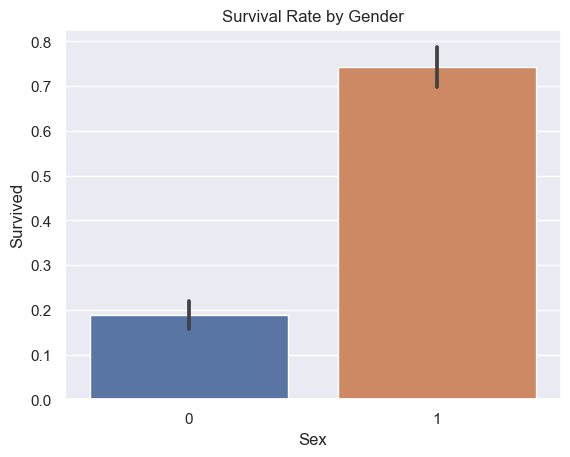

In [ ]:
sns.barplot(x='Sex',y='Survived',data= train_df)
plt.title('Survival Rate by Gender')
plt.show()

###  Survival Rate by Class

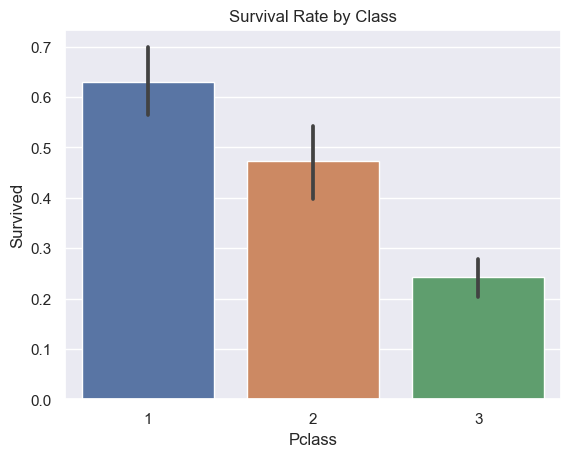

In [ ]:
sns.barplot(x='Pclass',y= 'Survived',data= train_df)
plt.title("Survival Rate by Class")
plt.show()

### Age Distribution of Survivors vs. Non-Survivors

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


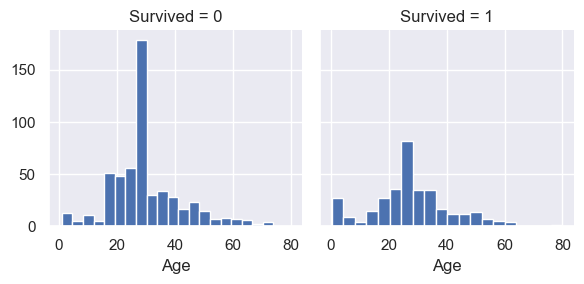

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

### Fare Distribution

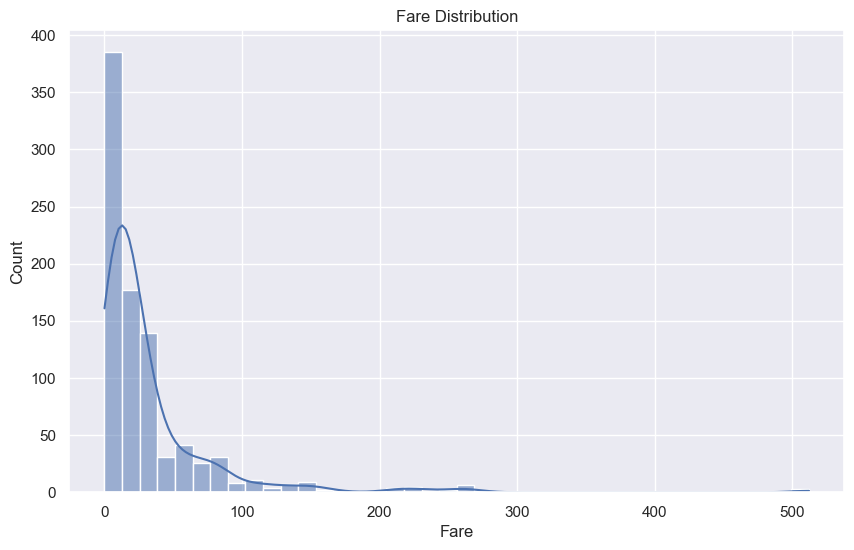

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.show()


###  Family Size and Survival

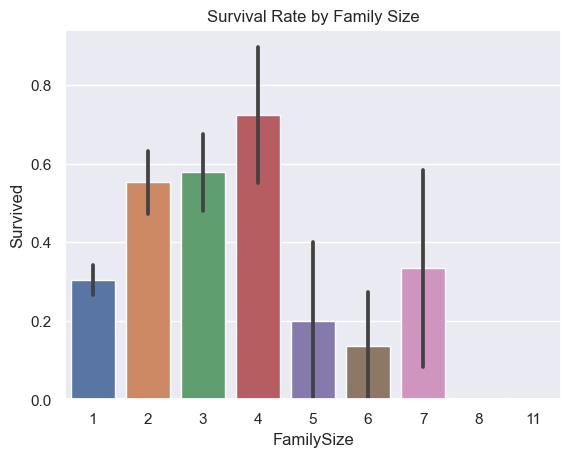

In [ ]:
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by Family Size')
plt.show()


###  Correlation Analysis

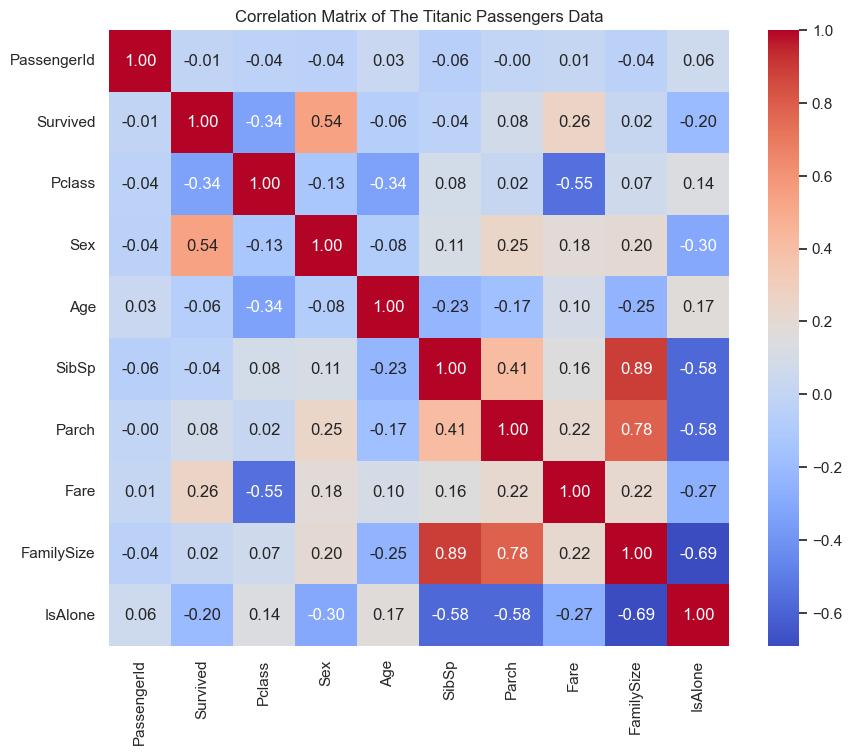

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of The Titanic Passengers Data')
plt.show()


## 3. Model Selection

### ff